In [326]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [327]:
conn=mysql.connector.connect(user='root',password='newpass123',host='localhost',database='shares')

In [328]:
mycursor=conn.cursor()

In [329]:
PriceHVolumeH="select b.symbol,last,(last-open)/open*100,b.tradedqty, v.avgvolume from shares.bhavdata b,shares.volumeAvgs v where date > curdate() -2 and (last-open)/open*100 > 1 and b.tradedqty > v.avgvolume * 1.5 and b.symbol = v.symbol and b.last > v.HIGH and tradedqty > 100000 order by tradedqty desc"

In [330]:
allbhavdata="select date,symbol,last,tradedqty from shares.bhavdata where date > curdate()-12"

In [331]:
mycursor.execute(allbhavdata)

In [332]:
rows=mycursor.fetchall()

In [333]:
pdata =pd.DataFrame(rows)
#pdata=pdata.set_index(pdata[pdata.columns[1]])
pdata.columns= ["date","symbol","price","volume"]
#del pdata['symbol']
#pdata.loc['8KMILES']

sharewisestats=pdata.groupby('symbol')
/* for symbol,symbol_df in sharewisestats:
    print(symbol)
    print(symbol_df) */
    

In [334]:
sharewisestats=pdata.groupby('symbol')
sharewisestats

In [335]:
pivoted_pricedf = pd.pivot_table(pdata, index='date',columns='symbol',values='price')
dma_price = pivoted_df.rolling(window=10).mean()
pivoted_volumedf = pd.pivot_table(pdata, index='date',columns='symbol',values='volume')
dma3_volume = pivoted_volumedf.rolling(window=3).mean()
dma3_volume.head()
dma_price.tail(-9)['AVANTIFEED']

date
2017-05-15     906.745
2017-05-16     940.340
2017-05-17     983.335
2017-05-18    1034.335
2017-05-19    1086.055
2017-05-22    1126.395
2017-05-23    1166.410
2017-05-24    1212.010
2017-05-25    1260.700
2017-05-26    1313.250
2017-05-29    1344.875
2017-05-30    1359.945
2017-05-31    1370.415
2017-06-01    1372.715
2017-06-02    1373.705
2017-06-05    1384.095
2017-06-06    1393.595
2017-06-07    1400.095
2017-06-08    1402.700
2017-06-09    1402.750
2017-06-12    1404.640
2017-06-13    1407.565
2017-06-14    1406.795
2017-06-15    1401.800
2017-06-16    1396.945
2017-06-19    1391.425
2017-06-20    1383.625
2017-06-21    1372.815
2017-06-22    1367.735
2017-06-23    1366.235
                ...   
2017-07-07    1474.785
2017-07-10    1489.185
2017-07-11    1513.005
2017-07-12    1536.650
2017-07-13    1555.960
2017-07-14    1564.130
2017-07-17    1577.030
2017-07-18    1588.355
2017-07-19    1593.255
2017-07-20    1601.375
2017-07-21    1611.475
2017-07-24    1617.975
2017-0

In [336]:
mean=sharedatastats['price']['mean'].loc['AVANTIFEED']
high=sharedatastats['price']['max'].loc['AVANTIFEED']
if mean < high:
    print ("symbol");
rolledData=pdata.price.rolling(3)
rolledData

symbol


Rolling [window=3,center=False,axis=0]

In [337]:
WhichShare="BEML"

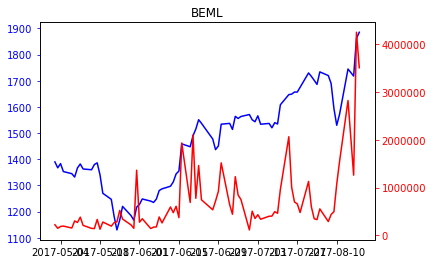

In [338]:
mycursor.execute("select tradedqty,nooftrades,last,date from shares.bhavdata where symbol =\'"+WhichShare+"\'")
rows=mycursor.fetchall()
volumeData=np.array(rows)
dates=volumeData[:,3]
fig, ax1 = pp.subplots()
ax1.plot(dates, volumeData[:,2], 'b-')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(dates, volumeData[:,0], 'r-')
ax2.tick_params('y', colors='r')
pp.title(WhichShare)
pp.show()